In [1]:
import pandas as pd
import swifter
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', -1)
pd.set_option('display.max_colwidth', -1)
import warnings; warnings.simplefilter('ignore')


In [2]:
train = pd.read_csv("/data/semeval-2020/task-7/task-1/train.csv")
dev = pd.read_csv("/data/semeval-2020/task-7/task-1/dev.csv")

In [3]:
train.head(100) 

,id,original,edit,grades,meanGrade
0,14530,France is ‘ hunting down its citizens who joined <Isis/> ’ without trial in Iraq,twins,10000,0.2
1,13034,"Pentagon claims 2,000 % increase in Russian trolls after <Syria/> strikes . What does that mean ?",bowling,33110,1.6
2,8731,Iceland PM Calls Snap Vote as Pedophile Furor Crashes <Coalition/>,party,22100,1.0
3,76,"In an apparent first , Iran and Israel <engage/> each other militarily",slap,20000,0.4
4,6164,Trump was told weeks ago that Flynn misled <Vice/> President .,school,0,0.0
5,8832,"All 22 <promises/> Trump made in his speech to Congress , in one chart",sounds,22200,1.2
6,12174,New DOJ alert system will flag <crimes/> against police,laughter,32100,1.2
7,3731,"As Someone Who Grew Up Among Fundamentalist <Christians/> In The US , I 'm Surprised Anyone 's Surprised About Roy Moore",morons,21110,1.0
8,6554,"Canadians may pay more taxes than Americans , but here 's what they get for their <money/>",loonies,10000,0.2
9,14191,Dutch minister resigns in drug baron <row/>,blow,0,0.0


In [4]:
dev.head(5)

,id,original,edit
0,1723,Thousands of gay and bisexual <men/> convicted of long-abolished sexual offences are posthumously pardoned,swans
1,12736,Special <prosecutor/> appointed to Trump Russia,chef
2,12274,Spanish police detain man and search Ripoll addresses in hunt for terror <suspects/>,squad
3,8823,N.Y. Times <reprimands/> reporter for sharing ' unfounded rumor ' about Melania Trump,applauds
4,5087,Vladimir Putin Releases Video Simulation Of Russian <Missile/> striking Florida conveniently right on top of USSOCOM headquarters at MacDill AFB .,balloon


In [5]:
train["grade_round"] = train["meanGrade"].apply(lambda x:round(x))

In [6]:
train["grade_round"].value_counts()

1    5380
0    2557
2    1662
3    53  
Name: grade_round, dtype: int64

In [7]:
from functools import partial 
def get_grade(position,grades):
    s_grades = str(grades)
    if len(s_grades) > 1:
        return int(s_grades[position])
    return 0

In [8]:
train["grades_0"]  = train["grades"].apply(partial(get_grade,0))
train["grades_1"]  = train["grades"].apply(partial(get_grade,1))
train["grades_2"]  = train["grades"].apply(partial(get_grade,2))
train["grades_3"]  = train["grades"].apply(partial(get_grade,3))
train["grades_4"]  = train["grades"].apply(partial(get_grade,4))

In [9]:
train.head(4)

,id,original,edit,grades,meanGrade,grade_round,grades_0,grades_1,grades_2,grades_3,grades_4
0,14530,France is ‘ hunting down its citizens who joined <Isis/> ’ without trial in Iraq,twins,10000,0.2,0,1,0,0,0,0
1,13034,"Pentagon claims 2,000 % increase in Russian trolls after <Syria/> strikes . What does that mean ?",bowling,33110,1.6,2,3,3,1,1,0
2,8731,Iceland PM Calls Snap Vote as Pedophile Furor Crashes <Coalition/>,party,22100,1.0,1,2,2,1,0,0
3,76,"In an apparent first , Iran and Israel <engage/> each other militarily",slap,20000,0.4,0,2,0,0,0,0


In [10]:
train["grades_0"].value_counts().sort_index()

0    523 
1    2296
2    3657
3    3176
Name: grades_0, dtype: int64

In [11]:
train["grades_1"].value_counts().sort_index()

0    1896
1    3816
2    3071
3    869 
Name: grades_1, dtype: int64

In [12]:
train["grades_2"].value_counts().sort_index()

0    3744
1    4030
2    1669
3    209 
Name: grades_2, dtype: int64

In [13]:
train["grades_3"].value_counts().sort_index()

0    6082
1    2875
2    652 
3    43  
Name: grades_3, dtype: int64

In [14]:
train["grades_4"].value_counts().sort_index()

0    8194
1    1286
2    159 
3    13  
Name: grades_4, dtype: int64

In [15]:
import re
def prepare_edited_new_headline(row):
    original_head_line = row.original
    edit = row.edit
    return re.sub(r'<.*/>', edit, original_head_line)

In [17]:
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()

contraction_patterns = [ (r'won\'t', 'will not'), (r'can\'t', 'cannot'), (r'i\'m', 'i am'), (r'ain\'t', 'is not'), (r'(\w+)\'ll', '\g<1> will'), (r'(\w+)n\'t', '\g<1> not'),
                         (r'(\w+)\'ve', '\g<1> have'), (r'(\w+)\'s', '\g<1> is'), (r'(\w+)\'re', '\g<1> are'), (r'(\w+)\'d', '\g<1> would'), (r'&', 'and'), (r'dammit', 'damn it'), (r'dont', 'do not'), (r'wont', 'will not') ]
def replaceContraction(text):
    patterns = [(re.compile(regex), repl) for (regex, repl) in contraction_patterns]
    for (pattern, repl) in patterns:
        (text, count) = re.subn(pattern, repl, text)
    return text

def get_original_headline(headline):
    return headline.replace("<","").replace("/>","")

def remove_stop_words(headline):
    my_doc = nlp(headline)
    token_list = []
    for token in my_doc:
        if token.text not in ['‘',"'"]:
            token_list.append(token.text.lower())

    return replaceContraction(" ".join(token_list))

text = """France is ‘ hunting down its citizens who joined Isis ’ without trial in Iraq"""



In [36]:
train["edited_head_line"]= train.swifter.apply(prepare_edited_new_headline,axis=1)\
            .swifter.apply(remove_stop_words)\
            .swifter.apply(replaceContraction)

dev["edited_head_line"]= dev.swifter.apply(prepare_edited_new_headline,axis=1)\
            .swifter.apply(remove_stop_words)\
            .swifter.apply(replaceContraction)


In [39]:
train["original_cleaned"] = train["original"].swifter.apply(get_original_headline)\
        .swifter.apply(remove_stop_words)\
        .swifter.apply(replaceContraction)
        
dev["original_cleaned"] = dev["original"].swifter.apply(get_original_headline)\
        .swifter.apply(remove_stop_words)\
        .swifter.apply(replaceContraction)


In [40]:
train.head(5)

,id,original,edit,grades,meanGrade,grade_round,grades_0,grades_1,grades_2,grades_3,grades_4,edited_head_line,original_cleaned
0,14530,France is ‘ hunting down its citizens who joined <Isis/> ’ without trial in Iraq,twins,10000,0.2,0,1,0,0,0,0,france is hunting down its citizens who joined twins ’ without trial in iraq,france is hunting down its citizens who joined isis ’ without trial in iraq
1,13034,"Pentagon claims 2,000 % increase in Russian trolls after <Syria/> strikes . What does that mean ?",bowling,33110,1.6,2,3,3,1,1,0,"pentagon claims 2,000 % increase in russian trolls after bowling strikes . what does that mean ?","pentagon claims 2,000 % increase in russian trolls after syria strikes . what does that mean ?"
2,8731,Iceland PM Calls Snap Vote as Pedophile Furor Crashes <Coalition/>,party,22100,1.0,1,2,2,1,0,0,iceland pm calls snap vote as pedophile furor crashes party,iceland pm calls snap vote as pedophile furor crashes coalition
3,76,"In an apparent first , Iran and Israel <engage/> each other militarily",slap,20000,0.4,0,2,0,0,0,0,"in an apparent first , iran and israel slap each other militarily","in an apparent first , iran and israel engage each other militarily"
4,6164,Trump was told weeks ago that Flynn misled <Vice/> President .,school,0,0.0,0,0,0,0,0,0,trump was told weeks ago that flynn misled school president .,trump was told weeks ago that flynn misled vice president .


In [41]:
original_headlines_train = train["original"].swifter.apply(get_original_headline)
original_headlines_dev = dev["original"].swifter.apply(get_original_headline)
edited_headlines_train = train["edited_head_line"]
edited_headlines_dev = train["edited_head_line"]

In [42]:
train.to_csv("ready_to_serve_train.csv",index=False)
dev.to_csv("ready_to_serve_dev.csv",index=False)

In [43]:
original_headlines_train.append(original_headlines_dev).to_csv("original_headlines.csv",index=False,header=True)
edited_headlines_train.append(edited_headlines_dev).to_csv("edited_headlines.csv",index=False,header=True)

In [50]:
from fastai.text import *

In [51]:
data_lm = TextLMDataBunch.from_csv(".","edited_headlines.csv",bs=128,text_cols="edited_head_line")

In [52]:
data_lm.batch_size

128

In [53]:
learn = language_model_learner(data_lm, Transformer, drop_mult=0.5).to_fp16()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.91E-02
Min loss divided by 10: 1.45E-02


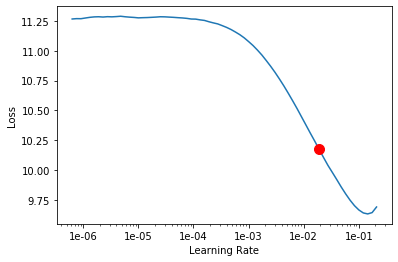

In [54]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [55]:
learn.fit_one_cycle(70, 6e-3)


epoch,train_loss,valid_loss,accuracy,time
0,10.544474,9.919501,0.013672,00:06
1,9.881332,9.042274,0.015718,00:07
2,9.308547,8.385072,0.017467,00:06
3,8.770084,7.774574,0.019810,00:07
4,8.250297,7.255301,0.036663,00:06
5,7.790296,6.958007,0.069810,00:06
6,7.418412,6.705349,0.077716,00:07
7,7.095930,6.446524,0.093155,00:07
8,6.779344,6.132982,0.117467,00:07
9,6.427195,5.736837,0.153106,00:07


In [56]:
# learn.unfreeze()
# learn.fit_one_cycle(16, 1e-3)

In [57]:
learn.save_encoder('ft_enc')


In [58]:
train["original_plus_edited"] = train.swifter.apply(lambda x: x.original_cleaned + x.edited_head_line,axis=1)

In [59]:
dev["original_plus_edited"] = dev.swifter.apply(lambda x: x.original_cleaned + x.edited_head_line,axis=1)

In [76]:
data_regr = (TextList.from_df(df=train, path=".", cols=['original_plus_edited'], vocab=data_lm.vocab)
             .split_by_rand_pct()
             .label_from_df('meanGrade',label_cls=FloatList)
             .add_test(TextList.from_df(df=dev, path=".", cols=['original_plus_edited']))
             .databunch(bs=96))

In [77]:
data_regr.show_batch()

text,target
"xxbos “ it ’s painfully obvious "" mueller will charge trump says roger stone . obstruction of justice or "" process - related matter ” most likely . “ it ’s painfully obvious "" mueller will charge battery says roger stone . obstruction of justice or "" process - related matter ” most likely .",0.2
"xxbos “ it ’s painfully obvious "" mueller will charge trump says roger stone . obstruction of justice or "" process - related matter ” most likely . “ it ’s painfully obvious "" mueller will xxunk trump says roger stone . obstruction of justice or "" process - related matter ” most likely .",2.2
xxbos alabama secretary of state ’s office on pro - doug jones pac ’s voter intimidation effort : a targeted effort to misinform and confuse voters ’ alabama secretary of state ’s office on pro - doug jones pac ’s voter intimidation effort : a targeted effort to misinform and confuse toddlers ’,1.2
"xxbos voters wanted the swamp drained , but they re - elected nearly all of the incumbents in congress . this is what they get . cultivators wanted the swamp drained , but they re - elected nearly all of the incumbents in congress . this is what they get .",0.2
"xxbos white house distances itself from paul manafort , who reportedly laundered money to himself from a pro - putin party ’s “ black ledger ” white house distances itself from paul manafort , who reportedly laundered clothes to himself from a pro - putin party ’s “ black ledger ”",0.8


In [88]:
learn = text_classifier_learner(data_regr, 
                                arch = Transformer, 
                                metrics=[rmse],
                                drop_mult=0.3).to_fp16()
learn.loss_func=MSELossFlat()
learn.load_encoder('ft_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (7722 items)
x: TextList
xxbos france is hunting down its citizens who joined isis ’ without trial in xxunk is hunting down its citizens who joined twins ’ without trial in iraq,xxbos iceland pm calls snap vote as pedophile furor crashes xxunk pm calls snap vote as pedophile furor crashes party,xxbos all 22 promises trump made in his speech to congress , in one xxunk 22 sounds trump made in his speech to congress , in one chart,xxbos canadians may pay more taxes than americans , but here 's what they get for their xxunk may pay more taxes than americans , but here 's what they get for their loonies,xxbos dutch minister resigns in drug baron xxunk minister resigns in drug baron blow
y: FloatList
0.2,1.0,1.2,0.2,0.0
Path: .;

Valid: LabelList (1930 items)
x: TextList
xxbos hannity : mueller could start civil war in xxunk : mueller could reenact civil war in homes,xxbos affirmative - action hypocrisy : foes hope to use asian - americans

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.98E-02
Min loss divided by 10: 3.02E-02


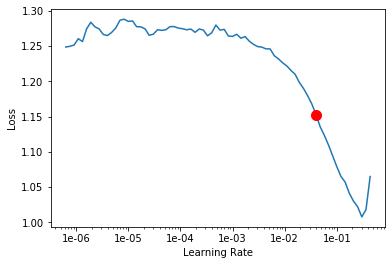

In [89]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [90]:
learn.fit_one_cycle(8,1e-2)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,1.051074,0.635210,0.795411,00:08
1,0.503774,0.352241,0.592886,00:08
2,0.376807,0.365110,0.603552,00:08
3,0.344186,0.338308,0.581305,00:08
4,0.328817,0.338900,0.581645,00:08
5,0.318626,0.338335,0.581243,00:08
6,0.303455,0.338018,0.581070,00:08
7,0.287274,0.339706,0.582511,00:08


In [ ]:
learn.model.children

In [83]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


KeyboardInterrupt: 

In [ ]:
learn.fit_one_cycle(8,1e-6)

In [ ]:
learn.show_results(10)

In [91]:
dev_set_predictions = learn.get_preds(DatasetType.Test)

In [92]:
dev["pred"] = dev_set_predictions[0].numpy()

In [93]:
dev.head()

,id,original,edit,edited_head_line,original_cleaned,original_plus_edited,pred
0,1723,Thousands of gay and bisexual <men/> convicted of long-abolished sexual offences are posthumously pardoned,swans,thousands of gay and bisexual swans convicted of long - abolished sexual offences are posthumously pardoned,thousands of gay and bisexual men convicted of long - abolished sexual offences are posthumously pardoned,thousands of gay and bisexual men convicted of long - abolished sexual offences are posthumously pardonedthousands of gay and bisexual swans convicted of long - abolished sexual offences are posthumously pardoned,1.102539
1,12736,Special <prosecutor/> appointed to Trump Russia,chef,special chef appointed to trump russia,special prosecutor appointed to trump russia,special prosecutor appointed to trump russiaspecial chef appointed to trump russia,0.898438
2,12274,Spanish police detain man and search Ripoll addresses in hunt for terror <suspects/>,squad,spanish police detain man and search ripoll addresses in hunt for terror squad,spanish police detain man and search ripoll addresses in hunt for terror suspects,spanish police detain man and search ripoll addresses in hunt for terror suspectsspanish police detain man and search ripoll addresses in hunt for terror squad,0.925781
3,8823,N.Y. Times <reprimands/> reporter for sharing ' unfounded rumor ' about Melania Trump,applauds,n.y. times applauds reporter for sharing unfounded rumor about melania trump,n.y. times reprimands reporter for sharing unfounded rumor about melania trump,n.y. times reprimands reporter for sharing unfounded rumor about melania trumpn.y. times applauds reporter for sharing unfounded rumor about melania trump,0.893555
4,5087,Vladimir Putin Releases Video Simulation Of Russian <Missile/> striking Florida conveniently right on top of USSOCOM headquarters at MacDill AFB .,balloon,vladimir putin releases video simulation of russian balloon striking florida conveniently right on top of ussocom headquarters at macdill afb .,vladimir putin releases video simulation of russian missile striking florida conveniently right on top of ussocom headquarters at macdill afb .,vladimir putin releases video simulation of russian missile striking florida conveniently right on top of ussocom headquarters at macdill afb .vladimir putin releases video simulation of russian balloon striking florida conveniently right on top of ussocom headquarters at macdill afb .,1.235352


In [94]:
dev[["id","pred"]].to_csv("/home/raghavan/Downloads/task-1-output.csv",index=False)

In [95]:
min(dev["pred"])

0.479736328125

In [96]:
max(dev["pred"])

1.6953125

In [35]:
round(0.6)

1